## Fertilizer Use

In [3]:
import pandas as pd
# put Python code to load the raw data
#fertiliser used per hectare for of cropland from 1961 to 2022
#https://ourworldindata.org/grapher/fertilizer-use-per-hectare-of-cropland?tab=table&showSelectionOnlyInTable=1&country=THA~VNM~IND
df_raw_fertiliser = pd.read_csv("../Raw Data/Fertilizer Use.csv")
df_raw_fertiliser = df_raw_fertiliser.rename(columns = {"All fertilizers use per area of cropland": "Fert_use"})

print(df_raw_fertiliser)

            Entity Code  Year  Fert_use
0      Afghanistan  AFG  1961      0.14
1      Afghanistan  AFG  1962      0.14
2      Afghanistan  AFG  1963      0.14
3      Afghanistan  AFG  1964      0.14
4      Afghanistan  AFG  1965      0.14
...            ...  ...   ...       ...
12166     Zimbabwe  ZWE  2017     35.71
12167     Zimbabwe  ZWE  2018     32.39
12168     Zimbabwe  ZWE  2019     32.39
12169     Zimbabwe  ZWE  2020     25.34
12170     Zimbabwe  ZWE  2021     25.34

[12171 rows x 4 columns]


In [4]:
#clean data fertiliser 1961 to 2021///1990 to 2019

#filter year
df_cleaner_fertiliser = df_raw_fertiliser.loc[(df_raw_fertiliser.Year >=1990) & (df_raw_fertiliser.Year <=2019)]

#filter countries
countries = ["Thailand", "Vietnam", "China", "India"]
df_cleaner_fertiliser = df_cleaner_fertiliser[df_cleaner_fertiliser.Entity.isin(countries)]
df_cleaner_fertiliser.reset_index(inplace = True, drop = True)
#print(df_cleaner_fertiliser)

#make columns based on country name
df_fert = pd.DataFrame()
df_fert["Year"] = df_cleaner_fertiliser["Year"].unique()

#make columns for amount of fertiliser use 
for country in countries:
    country_data = df_cleaner_fertiliser[df_cleaner_fertiliser.Entity == country].reset_index()
    country_data =country_data.Fert_use
    df_fert[country] = country_data

df_fert = df_fert.sort_values("Year")
print(df_fert)

    Year    Thailand     Vietnam      China       India
0   1990   50.660000   87.759995  207.73001   70.650000
1   1991   46.420002  121.689995  224.05000   74.790000
2   1992   54.330000  114.440000  223.41998   71.500000
3   1993   71.160000  111.569990  192.92001   72.729996
4   1994   66.939995  173.950000  221.86002   79.630000
5   1995   73.840000  181.269990  273.69000   81.660000
6   1996   75.750000  211.940000  276.71002   84.570000
7   1997   75.400000  204.340010  274.12000   95.170000
8   1998   85.030000  250.489990  275.53000   98.800000
9   1999   91.580000  264.770000  280.21000  106.130005
10  2000   80.160000  278.580000  263.13998   98.170006
11  2001   85.370000  215.640010  270.58000  102.130005
12  2002   88.979996  221.290000  305.04000   94.670006
13  2003  111.420000  246.320000  299.72998   98.979996
14  2004   97.750000  259.950000  320.34003  108.340004
15  2005   83.240005  229.440000  340.27000  119.920000
16  2006   85.320000  230.730000  339.42000  127

In [5]:
###Creates a csv file from the dataframe
#df_fert.to_csv('df_fertilizer_usage.csv', index=False)

In [6]:
# descriptive statistics
df_fert.describe()

,Year,Thailand,Vietnam,China,India
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,90.966667,224.335998,319.428666,120.008333
std,8.803408,21.699637,55.367602,69.281898,34.262290
min,1990.000000,46.420002,87.759995,192.920010,70.650000
25%,1997.250000,76.852500,206.240007,273.797500,94.795005
50%,2004.500000,88.424995,233.214995,327.700015,114.130002
75%,2011.750000,109.852500,262.305000,385.362500,152.677498
max,2019.000000,127.140000,304.360020,421.530000,171.760000


In [7]:
from copy import deepcopy
#RICE YIELD
master_df: pd.DataFrame = pd.read_csv("../Raw Data/rice-yields.csv")
working_df = deepcopy(master_df)
###Drop unused columns
working_df.drop(['Code'], axis=1, inplace = True)
#rename column names
working_df.rename(columns={"Entity": "Country", "Rice | 00000027 || Yield | 005419 || tonnes per hectare": "Rice Yield"}, inplace = True)


###Get dates between 1990 and 2019.
###This is like making another copy? So we are not modifying the working_df!
working_df_dated = working_df[(working_df.Year >= 1990) & (working_df.Year <= 2019)]

###Get selected countries.
countries = ["China", "India", "Thailand", "Vietnam"]
working_df_dated_country = working_df_dated[working_df_dated.Country.isin(countries)]

working_df_dated_country.reset_index(drop = True, inplace = True)

###Finalized df for crop yields for 4 countries.
print(working_df_dated_country)

df_rice = pd.DataFrame()
df_rice["Year"] =working_df_dated_country["Year"].unique()

for country in countries:
    country_data = working_df_dated_country[working_df_dated_country.Country == country].reset_index()
    country_data =country_data["Rice Yield"]
    df_rice[country] = country_data
print(df_rice)

     Country  Year  Rice Yield
0      China  1990      5.7261
1      China  1991      5.6402
2      China  1992      5.8031
3      China  1993      5.8479
4      China  1994      5.8311
..       ...   ...         ...
115  Vietnam  2015      5.7597
116  Vietnam  2016      5.5738
117  Vietnam  2017      5.5476
118  Vietnam  2018      5.8180
119  Vietnam  2019      5.8371

[120 rows x 3 columns]
    Year   China   India  Thailand  Vietnam
0   1990  5.7261  2.6125    1.9556   3.1815
1   1991  5.6402  2.6271    2.2534   3.1133
2   1992  5.8031  2.6092    2.1745   3.3342
3   1993  5.8479  2.8303    2.0497   3.4815
4   1994  5.8311  2.8645    2.3521   3.5657
5   1995  6.0248  2.6972    2.4158   3.6898
6   1996  6.2122  2.8226    2.4098   3.7689
7   1997  6.3192  2.8457    2.3788   3.8768
8   1998  6.3662  2.8805    2.4180   4.0007
9   1999  6.3447  2.9782    2.4244   4.1018
10  2000  6.2716  2.8508    2.6128   4.2432
11  2001  6.1633  3.1158    2.8739   4.2853
12  2002  6.1890  2.6163    2.93

## Scatterplots

In [8]:
# plot each country against crop yield
#China
df_China_rice = pd.DataFrame()
df_China_rice["Year"] = df_rice["Year"]
df_China_rice["Yield"] = df_rice["China"]
df_China_rice["Fertiliser"] = df_fert["China"]

#India
df_India_rice = pd.DataFrame()
df_India_rice["Year"] = df_rice["Year"]
df_India_rice["Yield"] = df_rice["India"]
df_India_rice["Fertiliser"] = df_fert["India"]

#Thailand
df_Thai_rice = pd.DataFrame()
df_Thai_rice["Year"] = df_rice["Year"]
df_Thai_rice["Yield"] = df_rice["Thailand"]
df_Thai_rice["Fertiliser"] = df_fert["Thailand"]

#Vietnam
df_Vietnam_rice = pd.DataFrame()
df_Vietnam_rice["Year"] = df_rice["Year"]
df_Vietnam_rice["Yield"] = df_rice["Vietnam"]
df_Vietnam_rice["Fertiliser"] = df_fert["Vietnam"]

Text(0, 0.5, 'Rice Yield')

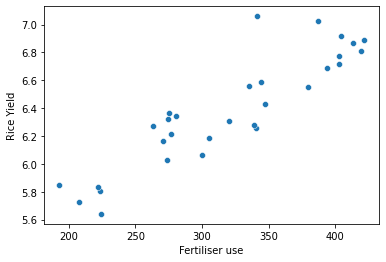

In [9]:
# visualization with analysis
#against crop yield
import seaborn as sns
#China
china_plot = sns.scatterplot(x="Fertiliser", y="Yield", data=df_China_rice)
china_plot.set_xlabel("Fertiliser use")
china_plot.set_ylabel("Rice Yield")


Text(0, 0.5, 'Rice Yield')

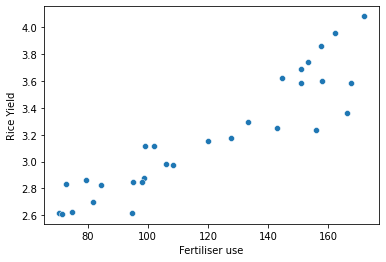

In [10]:
#India
india_plot = sns.scatterplot(x="Fertiliser", y = "Yield", data=df_India_rice)
india_plot.set_xlabel("Fertiliser use")
india_plot.set_ylabel("Rice Yield")

Text(0, 0.5, 'Rice Yield')

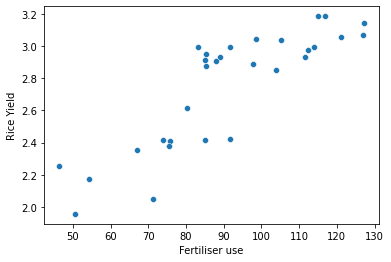

In [11]:
#thailand
thai_plot = sns.scatterplot(x="Fertiliser", y = "Yield", data=df_Thai_rice)
thai_plot.set_xlabel("Fertiliser use")
thai_plot.set_ylabel("Rice Yield")

Text(0, 0.5, 'Rice Yield')

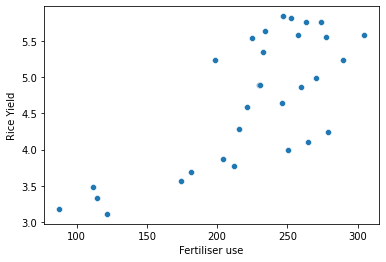

In [12]:
#vietnam
viet_plot = sns.scatterplot(x="Fertiliser", y = "Yield", data=df_Vietnam_rice)
viet_plot.set_xlabel("Fertiliser use")
viet_plot.set_ylabel("Rice Yield")